<font size=6>**ML Intro & Clustering**</font> </h6>

In this session we provide a short introduction to **Machine Learning**. We also present what one major application **Clustering** through a simple example. <br>
The goals are:

- to get a grasp of what **machine learning** is 
- to show the basic concept of **data exploration** and **interpretetion**


# A bit of introduction to ML

## What is machine learning ?

Arthur Samuel (1959): 

>*"Field of study that gives computers the ability to learn without being explicitly programmed."*

## How did we get here? 

<center><<img src="images/ml_history.png" width=800> 
    Figure 1.1. Timeline from Artificial Intelligence, to Machine Learning, and Deep learning.<br>
(Credit: <a href="https://blogs.nvidia.com/blog/2016/07/29/whats-difference-artificial-intelligence-machine-learning-deep-learning-ai/" target="_blank" rel="noopener noreferrer"> Nvidia blog - (an interesting read!</a>)</center>

## and ... why now? 

- More powerful, abundant, and cheap computation (CPUs/GPUs).
- Growing data sets.
- Advancements in underlying algorithms and implementation.

This is true for both everyday and Astronomy applications !

## ML branches

<center><<img src="images/ml_branches.png" width=800> 
Figure 2.1. Branches and example applications of Machine Learning<br>
(Credit: <a href="https://www.cognub.com/index.php/cognitive-platform/"
 target="_blank" rel="noopener noreferrer"> CogHub</a>)</center>

- **Supervised**: Labelled data where the algorithms learn to predict the output from the input data.
- **Unsupervised**: Non-labelled data where the algorithms learn to identify structures from the input data.
- **Semi-supervised**: Some labelled data - most is not - and a mixture of supervised and unsupervised techniques can be implemented.

## Unsupervised approaches in particular:

- Clustering: discover groupings or/and structures in the data, i.e. concentrations of datapoints or overdensities (e.g. the locations of galaxies in a BPT diagram)
- Association:  discover the rule(s) describing between variables or features in a dataset (e.g. customer recommendations)
- Dimentionality reduction: tool to reduce the number of input variables or features in a dataset (the more you have the more challenging it becomes to build a predictive model - referred to as *curse of dimentionality*) - also usefulf for visualization purposes.  

## Pros 
+ They can make new discoveries, as often enough we don’t know what they’re looking for in data.
+ They do not require training, which saves (huge) time on producing labels (manual classification tasks such as spectroscopic classification).
+ It reduces the chance of human error and bias, which could occur during manual labeling processes.
+ Unlabeled data is much easier and faster to get.<br>

## Cons
- Output needs careful proper interpretation: 
    - the groups may not match informational classes
    - extra effort has to be made to validate the groups. 
- Less accurate predictive results, as the labels are not part of the process and the method has to learn it by itself. 
- More time is needed to train these algorithms:
    - they need time to analyze and calculate all possibilities
    - the deal with huge datases that may increase computational complexity.


## The most critical take-home points:

- No matter which algorithm you pick, the goal of ML is to make **predictions** and **classifications**.
- There is **no optimal** algorithm, it all depends on your specific problem!<details>
<summary>( Click for an illustration of this point )</summary>
<center><img src="images/my-precious-not.jpg"> 
Figure 3.1. There is not a single algorithm to rule them all !!!<br>
(Credit: <a href="https://knowyourmeme.com/memes/my-precious"
 target="_blank" rel="noopener noreferrer"> knowyourmeme.com</a>)</center>
</details>




# Clustering

    or: "What can data tell us ?"

## Selecting a tool - the K-means algorithm

The K-means algorithm tries to partition a sample of N observations (with each observation being a $d$-dimensional vector) into $k$ individual clusters $C_k$. 

If we think naivly what we want to do is .... 

We first need to find a metric, i.e. to define the **loss function**, which (in this case) is the within-cluster sum-of-squares of the observations:

$$ Loss = \sum_{k=1}^{K} \sum_{i \epsilon C_k} ||x_i-\mu_k||^2$$,

where $\mu_k=\frac{1}{N_k}\sum_{i \epsilon C_k} x_i$ is the mean/centroid of the $N_k$ points included in each of the $C_k$ clusters. 

The solution comes from **minimizing** the above function, i.e.: 

$$ min (Loss) = \min_{\mu_k} \left (  \sum_{k=1}^{K} \sum_{i \epsilon C_k} ||x_i-\mu_k||^2 \right )$$. 

**IMAGE BEFORE OR AFTER ?**

<center><<img src="images/kmeans.gif"> 
Figure 5.1. Evolution of K-means centroids through iterations. <br>
(Credit: <a href="https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/"  target="_blank" rel="noopener noreferrer">Clustering with Scikit with GIFs, by David Sheehan</a>)</center>

**Steps**:
1. Initiate algorithm by selecting $k$ means <br>
    *e.g. select randomly $k$ observations as initial means - see also [Wiki:K-means initialization](http://en.wikipedia.org/wiki/K-means_clustering#Initialization_methods)*
2. Assign each observation to the nearest cluster
3. Calculate the new mean value for each cluster $C_k$ according to the new observations assiged
4. Repeat steps 2 and 3 up to the point that there are no updates in the assigments to the clusters.

A globally optimal minimum is not guaranteed (might converge to a local minimum). This is highly dependent on the initialization of the centroids. This is why, in practice, K-means is run multiple times with different starting values selecting the result with the lowest sum-of-squares error. To improve on that we can initially select centrodis that are generally distant from each other (sklearn implementation by using `init='k-means++'` parameter). For more see [Grouping data points with k-means clustering, by Jeremy Jordan](https://www.jeremyjordan.me/grouping-data-points-with-k-means-clustering/).

**Complexity**

$O(knT)$, where k, n and T are the number of clusters, samples and iterations, respectively.

**Pros**

- Simple and intuitive

**Cons**

- The number of clusters (K) must be provided (or cross-validated)
- There is an inherit assumption of isotropic clusters (i.e. not well fitted for elongated clusters, or manifolds with irregular shapes)
- Inertia is not a normalized metric: lower values are better , but as the dimensions increase so does the inertia

An alternative for faster implementation - Mini Batch K-means

For faster computations the sklearn offers the [Mini Batch K-means](http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans) method which simply breaks the initial set of observations/data points to smaller randomly selected subsamples.

For each subsample in the mini batch the assigned centroid is updated by taking into account the average of that subsample and all previous subsamples assigned to that centroid. This is repeated until the predefined number of iterations is reached. Its results are generally only slightly worse then the standard algorithm.

## An example from stellar sources

The following dataset originates from measurements of two spectral lines for a sample of stars. The strength of a spectral line can be measured by its equivalent width (EQW).  

<div style="text-align: center;">
<img src="images/equivalent_width-wiki.jpg"> 
Figure 12.1. Defining EQW: the width of a line with intensity equal to the local continuum and total flux equal to that of the line.   <br>
(Credit: <a href="https://en.wikipedia.org/wiki/Equivalent_width" 
 target="_blank" rel="noopener noreferrer">Wikipedia: Equivalent Width, by Szdori </a>)
    </img>
    </div>

Therefore, the larger the EQW the stronger the line is. The presence of spectral lines depends on the temperature of the stellar sources. Because of this, we see a developmet of different spectral lines as we move from the hottest to the cooler stars. This corresponds to moving from earlier spectral types (O-type stars; 50-25kK) to later ones (M-type; 3.5-2.5kK) [see the Morgan-Keenan spectral classification scheme](https://en.wikipedia.org/wiki/Stellar_classification)].

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import warnings
warnings.filterwarnings(action='once')
import sys
from collections import defaultdict

def flospecConv(arg):
    """
    Function to convert from spectral types to 
    float numbers (e.g. B0,O9.5 to 20.0,19.5)
    and backwards.
    """ 
    try:
        float(arg)
        if str(arg)[0]=='1':
            sp = 'O'
        elif str(arg)[0]=='2':
            sp = 'B'
        elif str(arg)[0]=='3':
            sp = 'A'
        else:
            sys.exit(' ! ERROR: more than O/B stars! Adjust conversion function.')
        new_arg = sp+str(arg)[1:]
    except ValueError:
        if arg[0]=='O' or arg[0]=='o':
            fl = '1'
        elif arg[0]=='B' or arg[0]=='b':
            fl = '2'
        elif arg[0]=='A' or arg[0]=='a':
            fl = '3'
        else:
            sys.exit(' ! ERROR: Check input! If more than O/B stars adjust conversion function.')
        new_arg = float(arg.replace(arg[0],fl))

    return new_arg

# Reading the data file:

PATH_data = "data/stellar_types.dat"

stars=defaultdict(list)
with open(PATH_data,'r') as inf:
    for line in inf:
        if line[0]!='#':
            cols = line.split()
            item = cols[0]
            spline = cols[1]
            if spline=='HeI/4471':
                ewHeI = cols[2]
                stars[item].append(ewHeI)
            elif spline=='HeII/4200':
                ewHeII = cols[2]
                stars[item].append(ewHeII)

# Creating data structures:

sptype, flosptype, ewHeI, ewHeII = [], [], [], []
for s in stars.keys():
    sptype.append(s.split('-')[0])
    flosptype.append(flospecConv(s.split('-')[0]))
    ewHeII.append(float(stars[s][0]))
    ewHeI.append(float(stars[s][1]))
    
# > Organizing data in an analysis-ready fashion:
X = np.column_stack((ewHeII,ewHeI))

print('Sample shape:')
print("___________________________________")
print('  X  | ' + str(X.shape))
print('     | ' + str(X.shape[0]) + ' samples x ' + str(X.shape[1]) + ' diagnostics' )

Sample shape:
___________________________________
  X  | (697, 2)
     | 697 samples x 2 diagnostics


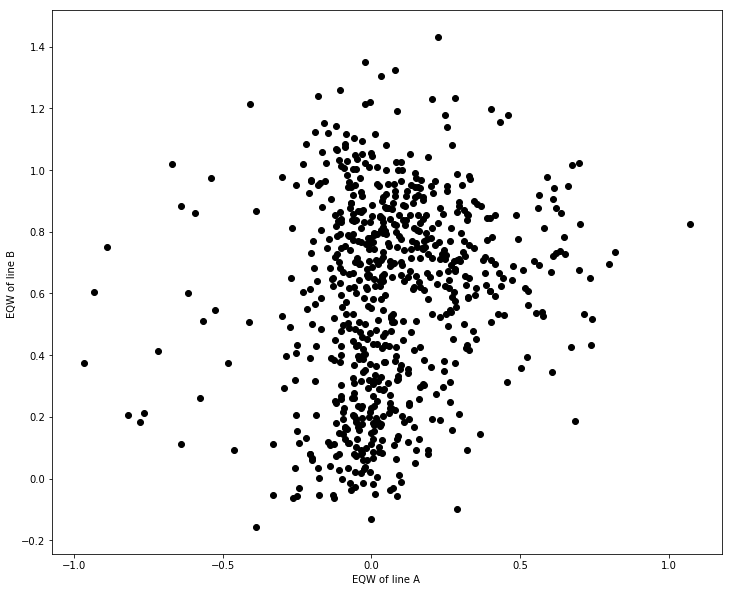

In [3]:
# PLOTTING

fig = plt.figure(figsize=(12,10)
                )
scat = plt.scatter(ewHeII, ewHeI, c='k')
# cb = plt.colorbar(scat, ticks=[15,22,29])   # range of available spectral types
# cb.set_ticklabels(['O5','B2','B9'])
# cb.set_label('Spectral Types')

plt.ylabel(r"EQW of line B ")
plt.xlabel(r"EQW of line A ")
plt.show()

_**Question**: So, how many clusters can you identify?_
<br>
Make a sketch of what YOU think!

Now let's try the clustering algorith to see what we get... 

## TASK : change the values and make a note of the outputs

Cluster centers:
[[-0.00749765  0.54657569]
 [ 0.01881435  0.91863139]
 [-0.0159055   0.15186048]
 [ 0.42132856  0.6945392 ]
 [-0.67356546  0.52196501]]


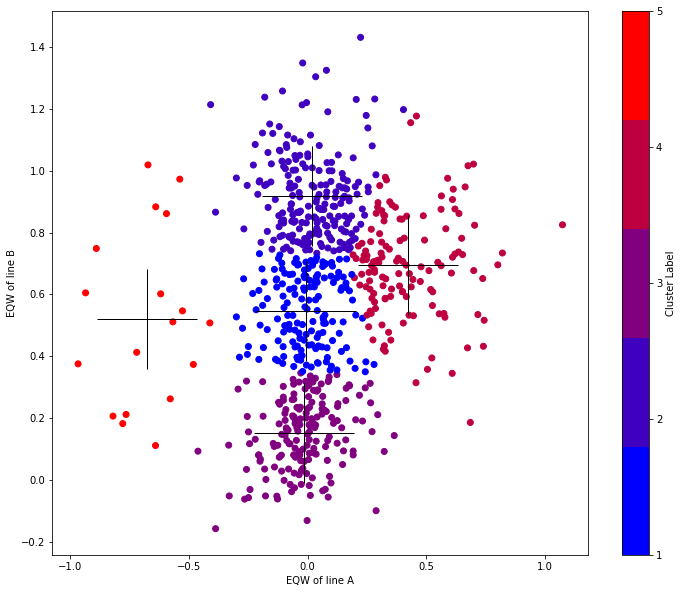

In [6]:
from sklearn.cluster import KMeans
import matplotlib

Clusters_kmeans = 5

kmeans_model = KMeans(n_clusters=Clusters_kmeans, random_state=0)
kmeans_model.fit(X)

print("Cluster centers:")
print(kmeans_model.cluster_centers_)

cc_x = kmeans_model.cluster_centers_[:,0]
cc_y = kmeans_model.cluster_centers_[:,1]

fig = plt.figure(figsize=(12,10))

plt.plot(cc_x, cc_y, 'k+', ms=100)

new_map = matplotlib.cm.gray.from_list('whatever', ('blue', 'red'), N=Clusters_kmeans)
scat2 = plt.scatter(ewHeII, ewHeI, c=kmeans_model.labels_, edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(0,Clusters_kmeans+1,1))   # number of clusters
cb.set_ticklabels(range(1,Clusters_kmeans+2,1))
cb.set_label('Cluster Label')

plt.ylabel(r"EQW of line B")
plt.xlabel(r"EQW of line A")

# plt.ylabel(r"EQW of HeI $\lambda$4471 ")
# plt.xlabel(r"EQW of HeII $\lambda$4200 ")

plt.show()

_**Question**: How does your guess performs wrt your guess ?_ 

_HINT_: this highly depends on the number of clusters you input and selected by visual inspection.
<br>

_**Question**: What can you say about the results if you start increasing the number of clusters?_

<br>
<details>
<summary>Click for answer</summary>
In the case of 2 clusters we see that the grouping is done based on the EQW of line B mainly. 
In the case of 3 clusters we notice that line A stars to contribute. 
If we start increasing the number of clusters we run into the problem of properly interpreting the results. In other words, we need to understand if these groupings correspond to physical gorups or not. This is exactly the point where interpretation of the resuls is needed. 
</details>

Let's take a look on the actual data now!

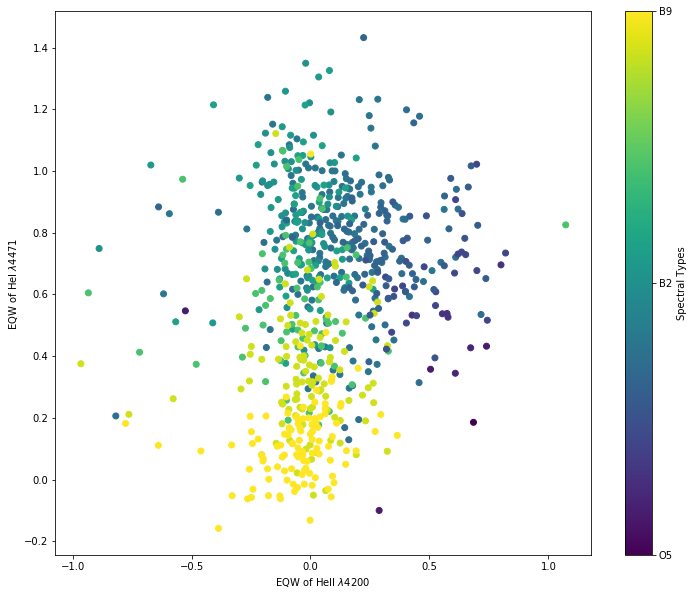

In [11]:
# PLOTTING

fig = plt.figure(figsize=(12,10)
                )
scat = plt.scatter(ewHeII, ewHeI, c=flosptype, edgecolors='face', cmap="viridis")
cb = plt.colorbar(scat, ticks=[15,22,29])   # range of available spectral types
cb.set_ticklabels(['O5','B2','B9'])
cb.set_label('Spectral Types')

plt.ylabel(r"EQW of HeI $\lambda$4471 ")
plt.xlabel(r"EQW of HeII $\lambda$4200 ")
plt.show()

_**Question**: Given this information how can you interpret the previous results?_
    
<br>
<details>
<summary>Click for answer</summary>
In the case of 2 clusters we see that the grouping is done based on the EQW of HeI 4471 line, which is able to separate the sample into late B-type stars (cooler) and early B-types plus O-types (hotter). 
If we consider 3 clusters then the HeII line 4200 helps to separate the early-B types from the (hotter) O-type stars.
A larger number of clusters will only perplex the image. 
</details>



&#9755; You will see more advanced techinques on data visualization in the **ML_Practices** session.

# 4. Clustering algorithms overview

We start by presenting a set of [**sklearn clustering**](http://scikit-learn.org/stable/modules/clustering.html) algorithms with toy datasets, and then we continue by applying some of them in various astrophyiscal datasets.

This serves as a showcase of the available methods and how they compare. You can easily adapt any of these methods to the following examples or your own problems. 

In [7]:
# Generate toy dataset

from sklearn import datasets
# Ignore sklearn warnings (remove when ready!):
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [8]:
# Setting up clustering parameters

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

/home/grigoris/.local/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/grigoris/.local/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
/home/grigoris/.local/lib/python3.6/site-packages/numpy/matrixlib/defma

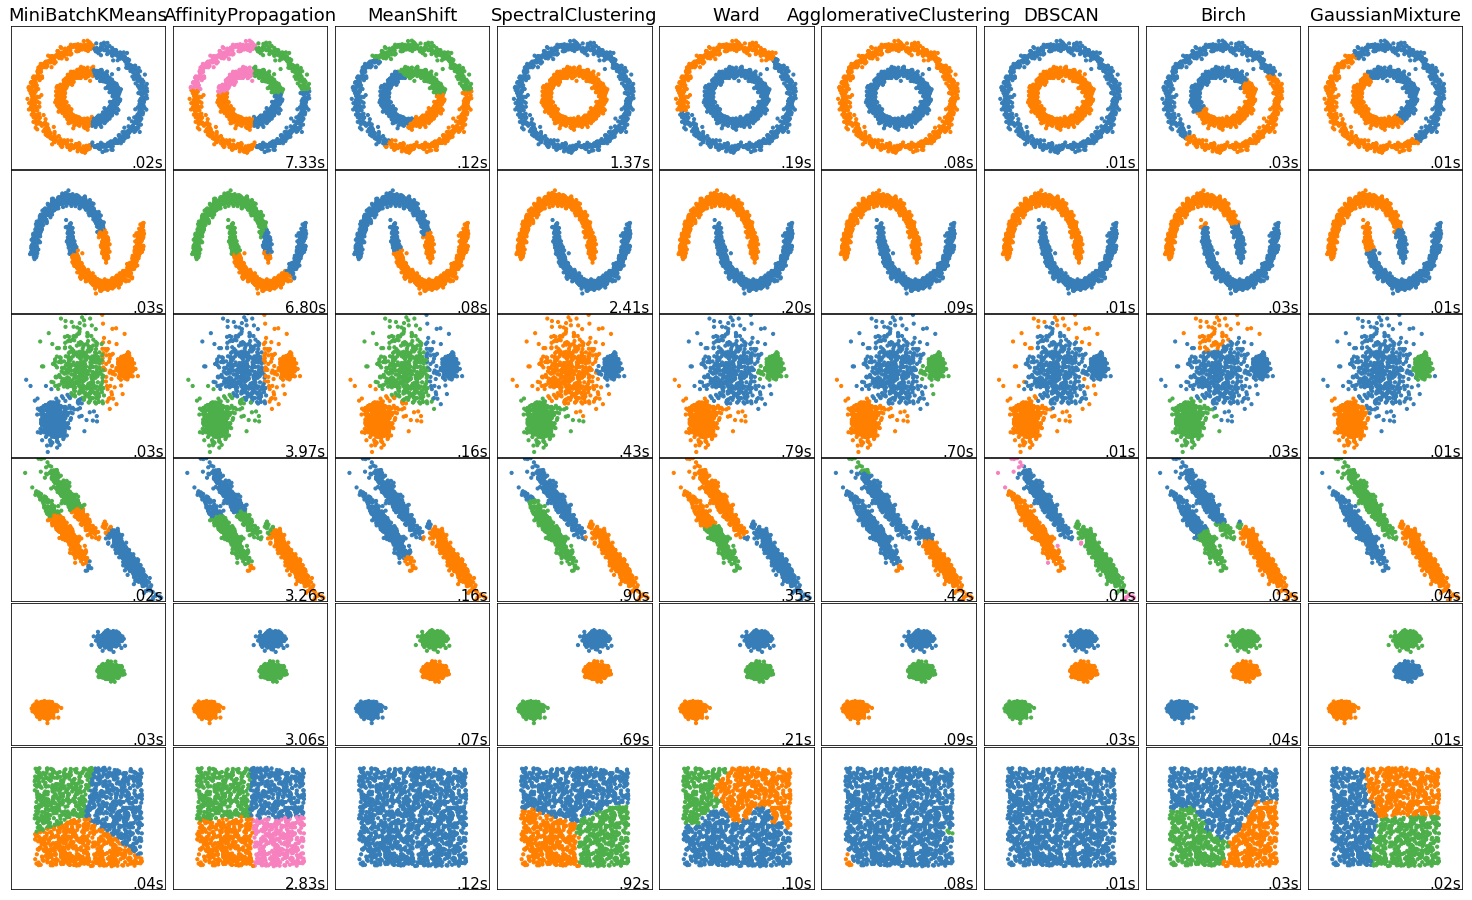

In [9]:
# Running and plotting

import time

from sklearn.neighbors import kneighbors_graph
from sklearn import cluster, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1


for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1


plt.show()

## Quiz time: take a few moments and explore the results - what do you notice? 

Really... write down some points here (and even better send them to slack!):

- point 1
- point 2




NOTE: The last dataset is an example of a 'null' situation for clustering, i.e. the data is homogeneous. 


## Some take-away points

<br>
<details>
    <summary> An indicative list: </summary>
<ul>
    <li> There is not a single best algorithm. 
    <li> Not all the algorithms identify the same number of clusters.
    <li> Some algorithms are better to detect arbitrary cluster shapes than others.
    <li> Some algorithms can be faster.
    <li> The intuitive clustering might not apply to very high dimensional data.
</ul>
</details>

# Further notes / resources

For the description of some other algorithms as well as some applications in astrophysical problems, take a look at the [Summer School for Astrostatistics 2022 material](https://github.com/astrostatistics-in-crete/2022_summer_school).

## How do they separate the clusters?

Typically, clustering algorithms use two types of hyperparamters:

- The properties of the data themselves<br>
    *e.g. density of points (minimum number of points and the area), distance between points, etc.*
- The number of clusters<br>
    *might be provided by the user or dynamically derived*

In the following sections we describe some of them in more detail. 

# 6. Mean Shift

Mean Shift identifies arbitraty shaped _blobs_ by locating the peaks of a density estimate of the data. It works by updating cadidates for centroids to be the mean of the points within a given region. (The candidates are filtered in a post processing step to eliminate near-duplicates.)

**Steps:**

For a given candidate centroid $x_i$ for iteration $t$, the candidate is updated by:

$$ x_i^{t+1} = m(x_i^{t}) $$

and their difference $m(x_i^{t}) - x_i^{t+1}$ is the **mean shift** vector. $m$ is calculated as:

$$m(x)=\frac{ \sum_{x_i\epsilon N(x)}K(x_i-x)x_i}{\sum_{x_i\epsilon N(x)}K(x_i-x)}$$.

which corresponds to the weighted mean of the points within a certain neighborhood neighborhood $N(x_i)$. The weighting is provided by a kernel function $K$, typically a gaussian:

$$ K(x_i-x)=e^{-c||x_i-x||^2}$$ 

The algorithm iteratively shifts the centroid of a cluster "climbing" the peak of the density distribution of the nearby data points. The search stops when the update in the centroid is below some threshold.

Apart from the kernel function, the user must also define the neighborhood $N(x)$, through the **bandwith** $h$ parameter. This implicitly sets the number of K of clusters which will be found. (There is also an automated estimation of this parameter by using [`sklearn.cluster.estimate_bandwidth`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html).)

<center><<img src="images/mean_shift.gif"> 
Figure 6.1. Evolution of a Mean Shift centroid through iterations. <br> The centroid "climbs" towards the center of the density distribution.<br>
(Credit: <a href="https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/"  target="_blank" rel="noopener noreferrer"> Clustering with Scikit with GIFs, by David Sheehan</a>)</center>

**Complexity**

$O(Tn^{2})$, where n and T are the number of samples and iterations, respectively.

**Pros**

- Guaranteed to converge

**Cons**

- The number of clusters implicitly set
- There is an inherit assumption of isotropic clusters
- Computationally expensive

# 7. Hierarchical Clustering

This type of clustering groups points by ranking them **bottom-up** (**agglomerative**) or **top-down** (**divisive**). The first approach merges close points into clusters based on the distance between them, while the latter starts from one clusters and split each point at a time. 

There are two important parameters: the distance metric (typically Euclidean) and the type of linkage. 

## Agglomerative Clustering

This is an example of the **bottom-up** case.

**Steps:**

1. Initiate with K$_{clusters}$ = N$_{points}$
2. Calculate the distances between all the pairs of points
3. Iteratively connect the nearest pairs of points until obtaining a single cluster<br>
    *(see the dendrogram below)*
4. Merge all clusters below a threshold, which could be:
    - a given number of clusters (stop at K clusters)
    - a given separation

<center>
<table><tr>
    <td width=500>
        <img src="images/dendogram.jpeg">
    </td>
    <td width=500>
        <img src="images/hierarchical.gif">
    </td>
</tr></table>
    Figure 7.1.1. <i>Left:</i> Construction of dendogram and application of decision threshold. <i>Right:</i> Animated explanation of Hierarchical Clustering.<br>
(Credit: <a href="https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/"  target="_blank" rel="noopener noreferrer">Clustering with Scikit with GIFs, by David Sheehan</a>)    
</center>

**Type of  point linking for Agglomerative Clustering**

For additional complexity, one can chose other solutions other than the pairwise coupling of points.

<br>
<center><img src="images/cluster_distances.jpeg" width=400> 
Figure 7.1.2. Type of point linking for Agglomerative Clustering.  <br>
(Credit: <a href="https://www.youtube.com/watch?v=VMyXc3SiEqs"  target="_blank" rel="noopener noreferrer"> Hierarchical Clustering 3: single-link vs. complete-link, by  Victor Lavrenko</a>)    
</center>

**Complexity**

$O(n^2 log(n))$, where n is the number of points. 

**Pros**

- No need to specify number of clusters in advance
- Eary to implement and explain the results

**Cons**

- Cannot update connections 
- Use of different distance metrics can yield different results
- Very slow and computationally expensive
- Not scalable to large datasets 


## Ward

Is also an aggomerative algorithm in which case the linkage is performed by minimizing the sum of the squared differences of the point within all clusters (variance - minimizing approach). In practice it is similar to k-means but with a heararchical approach. 


# 8. DBSCAN or Density Based Spatial Clustering of Applications with Noise

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Thus, clusters found by DBSCAN can be of any shape - as opposed to other algorithms (K-means for example) which assume that clusters are convex shaped.

It uses 2 parameters:
* $eps$ : neighborhood size
* $minPts$ : minimum number of points for a neighborhood to be considered dense

<center>
<table><tr>
    <td width=500>
        <img src="images/dbscan.png">
    </td>
    <td width=500>
        <img src="images/dbscan-smiley.gif">
    </td>
</tr></table>
    Figure 8.1. Definition of core, border, and noise points, according to DBSCAN (left), and an example of how it constructs clusters (right).<br>
(Credit: <a href="https://arogozhnikov.github.io/2017/07/10/opera-clustering.html"  target="_blank" rel="noopener noreferrer">Clustering applied to showers in the OPERA, by Alex Rogozhnikov</a>)    
</center>

With a sinlge (1) scan we can label the points as: **core**, **border**, **noise**. How?

-  A point $p$ is defined **core** if at least $minPts$ points are within the area defined by $eps$
-  A **border** point is a non-core point that has at least 1 core point in its neighborhood
-  A **noise** point is neither a core nor a border point. There represent outliers in the data set

Defined these, DBSCAN operates as follows.

**Steps:**

1. Algorithm picks 1 unassigned core point ($p_c$)
2. Let $p_c$ be the current point being explored
3. Add all points ($q$) of $p_c$’s neighborhood to the same cluster
4. Some of these $q$ points are also core points so: recursively apply this search on each unexplored core point of this neighborhood
5. When all neighbourhood points have been joined, DBSCAN proceeds with a new cluster

Process ends when all points have been assigned to a cluster or identified as noise.  

**Complexity**

$O(n^2)$, where n is the number of points. 

**Pros**
- Any number of clusters
- Clusters of varying size and shape
- Finds and ignores outliers

**Cons**
- Relatively slow
- Extremely sensitive to parameters choice
- In rare cases, border points move to an other cluster when DBSCAN is re-run
- Serious troubles with clusters with varying density<br>
  *(OPTICS and HDBSCAN are variations which address this problem)*

# 9. Which to select ? 
| Algorithm                | fixed n$_{clusters}$ ? |
| :----------------------: | :--: |
| KMeans                   | yes  |
| Mean Shift               | implicitly |
| Agglomerative Clustering | yes or no |
| DBSCAN                   | no |

&#8618; check also [sklearn's table on clustering overview](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods)


# 10. Application 1: Classify Star-forming objects in a BPT diagram

The "Baldwin, Phillips & Terlevich" (BPT) diagrams are used to distinguish sources based on specific spectral emission lines. The strengths of these lines depend on the heating source (see e.g. [BPT diagram, NED](https://ned.ipac.caltech.edu/level5/Glossary/Essay_bpt.html)).

BPTs allow to distinguish:
- AGNs (Seyfert)
- LINERs
- Star-forming galaxies
- Composite objects

<center><img src="images/BPT.png"> 
Figure 10.1. Example of classification via BPT diagram.<br> Theoretical or observationally-calibrated curves allow to distinguish the different subpopulations.<br>
(From <a href="https://ui.adsabs.harvard.edu/abs/2010ApJ...720..555P/abstract" target="_blank" rel="noopener noreferrer"> Parra et al. (2010), ApJ, 720, 555</a>)</center>

## The sample

We will use the data by [Stampoulis et al. (2019), MNRAS, 485, 1085](https://ui.adsabs.harvard.edu/abs/2019MNRAS.485.1085S/abstract), which provides the OIII, NII, SII, and OI diagnostics for ~130 000 objects.

The work also gives classifications, which we will use as a reference.

--- 

**TASK 1: Find the best clustering algorithm for separating star-forming objects**

**TASK 2: Plot results and check consistency with BPT theoretical curves**

**CHALLENGE: Consult the sklearn's pages to tune more hyperparameters!**

## Loading and setting up the data

In [ ]:
# CREATING DATA STRUCTURE

# > Loading the emission line data and classifications from Stampoulis+19:

PATH_Stampoulis_data = "data/Stampoulis+19_Table_2.csv"

data = np.genfromtxt(PATH_Stampoulis_data, delimiter=",")
# The data file is organized in 138799 lines (i.e. different objects), and 12 columns

# To check file dimensions:
# print(data.shape)

ID               = data[:,0]  # object ID
NII_diagnostic   = data[:,3]  # log10 ( NII_6584  / H_alpha )
SII_diagnostic   = data[:,4]  # log10 ( SII_6717  / H_alpha )
OI_diagnostic    = data[:,5]  # log10 ( OI        / H_alpha )
OIII_diagnostic  = data[:,6]  # log10 ( OIII_5007 / H_beta )

labels = np.genfromtxt(PATH_Stampoulis_data, delimiter=',', usecols=-1, dtype=str)
# reading labels from last column
# Activity class labelling scheme:
#   0 <-> SFG (Star Forming Galaxy)
#   1 <-> SEY (Seyfert)
#   2 <-> LIN (LINER)
#   3 <-> COM (Composite)

# Dictionary containg class name and associated label:
from collections import OrderedDict
classes = OrderedDict()
classes["SFG"] = 0
classes["SEY"] = 1
classes["LIN"] = 2
classes["COM"] = 3

labels = [int(float(label)) for label in labels]
# converting labels from strings to integers

# > Organizing data in an analysis-ready fashion:
X_sample = np.stack((OIII_diagnostic,NII_diagnostic,SII_diagnostic,OI_diagnostic),axis=-1)
y_sample = labels

We will use only 1 every "sampling_factor" objects for two reasons:

- to speed up the exercise
- to avoid crashes due to memory limitations.

You can try to use the full sample when confident with the setup (and your computer power!).

In [ ]:
# SUGGESTION: Use only 1 every <sampling_factor> objects 

sampling_factor = 50
# sample 1 every <sampling_factor> data to avoid computational delay

X = X_sample[::sampling_factor]
y = y_sample[::sampling_factor]

print('Sample shape:')
print("_____________________________________")
print('  X  | ' + str(X.shape))
print('     | ' + str(X.shape[0]) + ' samples x ' + str(X.shape[1]) + ' diagnostics' )
print("-----|-------------------------------")
print('  y  | ' + str(len(y)) + ' labels')

Although available, we will not use the labels for the analysis, but only for the first representation of the data.

## Visualizing the data
Essentially reproducing Figure 5 in Stampoulis+ 2019

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colors

# Limit scatter plots (not histograms) in showing a maximum of <N_plot> objects:
# for full sample size, use: N_plot = len(X)
N_plot = 5000
# NOTE: reducing the sample in the plot helps visualizing the density

# Creating a colormap where:
#   red    <-> SFG
#   yellow <-> SEY
#   blue   <-> LIN
#   green  <-> COM
cmap = mpl.colors.ListedColormap(['red','orange','blue','green'])

# Remeber that the sample X is organized as:
#  X[:,0] <-> OIII_diagnostic
#  X[:,1] <-> NII_diagnostic
#  X[:,2] <-> SII_diagnostic
#  X[:,3] <-> OI_diagnostic


# PLOT THE DIAGNOSITCS

# > Classification lines
#   NII:
x1 = np.linspace(-2, 0.05, 100)
x2 = np.linspace(-2, 0.47, 100)
x3 = np.linspace(-0.1839, 1)
ke01_NII = 0.61 / (x1-0.05) + 1.3   # Kewley+01
ka03_NII  = 0.61 / (x2-0.47) + 1.19 # Kuffmann+03
sc07_NII  = 1.05 * x3 + 0.45        # Schawinski+07
#   SII:
x4 = np.linspace(-2, 0.05, 100)
x5 = np.linspace(-0.3, 1)
ke01_SII  = 0.72 / (x4-0.32) + 1.3  # Kewley+01
ke06_SII  = 1.89 * x5 + 0.76        # Kewley+06
#   OI:
x6 = np.linspace(-2, -0.8, 100)
x7 = np.linspace(-1.1, 0)
ke01_OI = 0.72 / (x6+0.59) + 1.33  # Kewley+01
ke06_OI = 1.18 * x7 + 1.30         # Kewley+06

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0, left=0.1, right=0.95, wspace=0.4)

ylim = [-1.2,1.5] # OIII_diagnostic range

# > left plot

xlim = [-2,1] # NII_diagnostic range

ax = fig.add_subplot(131)
im = ax.scatter(X[:, 1], X[:, 0], c=y, s=2, lw=0, cmap=cmap, zorder=2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.set_xlabel('log([NII]/H$_{α})$', fontsize=14)
ax.set_ylabel('log([ΟII]/H$_{β})$', fontsize=14)
#
ax.plot(x1, ka03_NII, "--", color='red',  linewidth = 1.0, label='Ka03')
ax.plot(x2, ke01_NII, "-",  color='red',  linewidth = 1.0, label='Ke01')
ax.plot(x3, sc07_NII, "-",  color='blue', linewidth = 1.0, label='Sc07')
ax.legend()

# legend:
ax.text(0.1,0.25, "SFG", color='red',    transform=ax.transAxes, fontsize=14)
ax.text(0.1,0.20, "SEY", color='orange', transform=ax.transAxes, fontsize=14)
ax.text(0.1,0.15, "LIN", color='blue',   transform=ax.transAxes, fontsize=14)
ax.text(0.1,0.10, "COM", color='green',  transform=ax.transAxes, fontsize=14)

# > central plot

xlim = [-1.4,0.7] # SII_diagnostic range

ax = fig.add_subplot(132)
im = ax.scatter(X[-N_plot:, 2], X[-N_plot:, 0], c=y[-N_plot:], s=2, lw=0, cmap=cmap, zorder=2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.set_xlabel('log([SII]/H$_{α})$', fontsize=14)
ax.set_ylabel('log([ΟII]/H$_{β})$', fontsize=14)
#
ax.plot(x4, ke01_SII, "-",  color='red',  linewidth = 1.0, label='Ke01')
ax.plot(x5, ke06_SII, "-",  color='blue', linewidth = 1.0, label='Ke06')
ax.legend()


# > right plot

xlim = [-2.2,0.0] # OI_diagnostic range

ax = fig.add_subplot(133)
im = ax.scatter(X[-N_plot:, 3], X[-N_plot:, 0], c=y[-N_plot:], s=2, lw=0, cmap=cmap, zorder=2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.set_xlabel('log([OI]/H$_{α})$', fontsize=14)
ax.set_ylabel('log([ΟII]/H$_{β})$', fontsize=14)
#
ax.plot(x6, ke01_OI, "-",  color='red',  linewidth = 1.0, label='Ke01')
ax.plot(x7, ke06_OI, "-",  color='blue', linewidth = 1.0, label='Ke06')
ax.legend()


plt.show()

# NOTE: Ignore the warning, due to the plotting of the lines

## Running clustering algorithms and plotting

In [ ]:
import time

from sklearn.neighbors import kneighbors_graph
from sklearn import cluster, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

plt.figure(figsize=(9 * 2 + 3, 8))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

params = {'quantile': .08,
            'eps': .4,
            'damping': .9,
            'preference': -600,
            'n_neighbors': 10,
            'n_clusters': 2}

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
k_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)
average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)
complete_linkage = cluster.AgglomerativeClustering(
    linkage="complete", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)
spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=params['eps'])
affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])
birch = cluster.Birch(n_clusters=params['n_clusters'])
gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans', k_means),
    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('AgglomerativeClustering', average_linkage),
    ('DBSCAN', dbscan),
    ('Birch', birch),
    ('GaussianMixture', gmm)
)

# restoring normalization for plotting
X_plot = X_sample[::sampling_factor]

for name, algorithm in clustering_algorithms:
    t0 = time.time()

    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)
        
    plt.subplot(1, len(clustering_algorithms), plot_num)
    plt.title(name, size=18)

    plt.plot(x1, ka03_NII, "--", color='grey',  linewidth = 1.0, label='Ka03')
    plt.plot(x2, ke01_NII, "-",  color='grey',  linewidth = 1.0, label='Ke01')
    plt.plot(x3, sc07_NII, "-",  color='grey', linewidth = 1.0, label='Sc07')
    
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X_plot[:, 2], X_plot[:, 0], s=2, color=colors[y_pred])
    plt.scatter(X_plot[y_pred==-1,2], X_plot[y_pred==-1,0], s=100, facecolors='none', edgecolors='black', color='black', label='background', alpha=0.1, zorder=0)
    # marking background class for DBSCAN

    plt.gca().set_xlim(-2,1)     # NII_diagnostic range
    plt.gca().set_ylim(-1.2,1.5) # OIII_diagnostic range

    plt.xticks(np.arange(xlim[0], xlim[1], step=1))
    plt.yticks(np.arange(ylim[0], ylim[1], step=0.5))

    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
             transform=plt.gca().transAxes, size=15,
             horizontalalignment='right')
    plot_num += 1


plt.show()

## Question: Which algorithm performs best?
<br>
<details>
<summary>Click for answer</summary>
The Ward algorithm seems to be the best in separating Star-Forming Galaxies.

Other algorithms (e.g. Affinity Propagation) might be considered valid if we join some clusters.
</details>


# 11. Application 2: Count stellar clusters

In [Bitsakis, et al. (2017), ApJ, 845, 56]( https://ui.adsabs.harvard.edu/abs/2017ApJ...845...56B/abstract) we describe a technique for the detection of star clusters in the Large Magellanic Cloud. The basic step for the cluster detection was converting the observed images into pixel-maps, where each star was represented by a single pixel.

In this exercise we use clustering algorithms to detect clusters in simulated stellar fields, which we have already converted to pixel-maps. Each pixel-map includes an arbitrary (unknown to the student) number of clusters. The first 3 images present increasing noise levels. One last map has been smoothed to simulate observational data.

--- 

**TASK: Guess the number of stellar clusters in the provided images using cluster algorithms**

**CHALLENGE: Consult the sklearn's pages to tune more hyperparameters!**

## Loading and visualizing the data


In [ ]:
from matplotlib import pyplot as plt

# FITS manipulation:
from astropy.io import fits

PATH_cluster_files = [
    "data/clusters_0.fits",
    "data/clusters_1.fits",
    "data/clusters_2.fits",
    "data/clusters_2_smooth.fits"]

# > Loading fits files:
image_data = []

for i, PATH_cluster_file in enumerate(PATH_cluster_files):

    hdulist = fits.open(PATH_cluster_file)
    image_data.append(hdulist[0].data)
    hdulist.close()

# > Displaying fits files:    
fig = plt.figure(figsize=(18, 10))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0, left=0.1, right=0.95, wspace=0.4)

for i in range(len(PATH_cluster_files)):

    ax = plt.subplot(1, 4, int(i+1))  
    ax.imshow(image_data[i], cmap='gray', vmin=-1, vmax=0.5*np.max(image_data[i]), origin='lower')

print('All black pixels have a value of %s' % int(np.min(image_data[0])))
print('All white pixels have a value of %s' % int(np.max(image_data[0])))

## Setting up the data

In [ ]:
# CONVERTING FROM IMAGE FORMAT TO STANDARD FORMAT FOR CLASSIFIER

'''
The image shape loaded with fits.open() is:
    <n_pixels, n_pixels>
where each element represents an image row (intensity_1, intensity_2, ... , intensity_n).
We will convert this to the more convenient shape:
    X = <n_pixels^2, 3>
where each element represents a single pixel (x, y, intensity).
This is the format used by clustering algorithms.
'''

datasets = []
# list containing all images

for i, PATH_cluster_file in enumerate(PATH_cluster_files):

    x = np.arange(image_data[i].shape[1])
    y = np.arange(image_data[i].shape[0])
    # NOTE: python inverts i with j index
    xx, yy = np.meshgrid(x, y)

    X_image = np.array([xx.ravel(), yy.ravel(), image_data[i].ravel()]).T

    X_image = X_image[X_image[:,2]!=0]
    # removing background pixels (i.e. pixels with flux == 0)
    # NOTE: noise pixels are still in the sample!
    
    if(PATH_cluster_file == "data/clusters_2_smooth.fits"):
    # NOTE: For the smoothed image, we will apply a background thershold or else
    #       too many data points will be used and the clustering algorithms will
    #       crash due to memory limitations.
        X_image = X_image[X_image[:,2]>100]
    
    # After dealing with background, now going back to 2D (x, y):
    X_image = X_image[:,0:2]
    # NOTE: We will only be using the (x,y) position of the stars (not the pixel "intensity"
    
    print("Image " + str(PATH_cluster_file) + " shape | " + str(X_image.shape))
        
    datasets.append(X_image)
    
# > Displaying new image format:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0, left=0.1, right=0.95, wspace=0.4)

for i in range(len(PATH_cluster_files)):

    X_image = datasets[i]
    
    ax = plt.subplot(1, 4, int(i+1))  
    ax.scatter(X_image[:,0],X_image[:,1], s=1)
    
print('\nNOTE: These are not images of stars: they only represent the positions of the stars.')
print('Therefore, we will only be using the (x,y) position of the stars (not the pixel "intensity").')    

## Guessing the number of stellar clusters in the provided images using cluster algorithms

HINT: To speed up the procedure, you might want to comment out the algorithms which use a fixed number of clusters

In [ ]:
import time

from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

plt.figure(figsize=(9 * 2 + 3, 16))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .03,
                'eps': .05,
                'damping': .9,
                'preference': -3,
                'n_neighbors': 5,
                'n_clusters': 20,
                'threshold':0.1}

for i_dataset, dataset in enumerate(datasets):
    params = default_base.copy()

    X = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=None, linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(
        n_clusters=params['n_clusters'],threshold=params['threshold'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        #('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        #('SpectralClustering', spectral),
        #('Ward', ward),
        #('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch)
        #('GaussianMixture', gmm)
    )
    # NOTE: Not considering algorithms which need the number of clusters as input

    print("> %-30s" % PATH_cluster_files[i_dataset])

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        plt.scatter(X[y_pred==-1,0], X[y_pred==-1,1], s=100, facecolors='none', edgecolors='black', color='black', label='background', alpha=0.1, zorder=0)
        # marking background class for DBSCAN

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

        
        n_clusters_ = len(set(y_pred)) - (1 if -1 in y_pred else 0)
        n_noise_    = list(y_pred).count(-1)

        print("  %-25s | n_clusters %-3s | n_noise points %-3s" % (name, n_clusters_, n_noise_))


plt.show()

## Actual number of clusters

| File                   | n$_{clusters}$   |
| :--------------------: | :-: |
| clusters_0.fits        | 22  |
| clusters_1.fits        | 31  |
| clusters_2.fits        | 45  |
| clusters_2_smooth.fits | 45  |


## Question: Which algorithm performs best?
<br>
<details>
<summary>Click for answer</summary>
DBSCAN seems the most efficient, especially for the non-smoothed images. This is because it is able to deal with the noise (not by chance, DBSCAN is the acronym for "Density-Based Spatial Clustering of Applications _with Noise_").

Additional post-clustering processing (e.g. rejecting clusters with a small number of samples), can further improve the results.

The detection is more problematic when pixel get smoothed (as in real images). Check Bitsakis+ 2017 for a technique to deal with detection in observational data.
</details>

## Question: Should  we be _also_ using the 3rd dimension, i.e. the pixel intensity?
<br>
<details>
<summary>Click for answer</summary>
In this case no. Because all pixels have the same value (999), therefore the pixels will appear all "clustered"  in the 3D dimension. This would make harder the separation of clusters.
    </details>

# 12. Application 3: Separate stellar types 

The [Morgan-Keenan spectral classification scheme](https://en.wikipedia.org/wiki/Stellar_classification) is a series of temperature, from the highest (O-type stars; 50-25kK) to the lowest (M-type; 3.5-2.5kK). Because of this, we see a developmet of different spectral lines as we move from the earliest to the latest spectral types. 

The strength of a spectral line can be measured by its equivalent width (EQW). The EQWs of the HeII 4200 line and HeI 4471 line can be used to separate stellar spectral types. The first one is a good indicator of **O-type** stars while the second is stronger in **early B-type** stars. The absence of both characterizes late **B-type stars**. 

&#9733; For more details see [Maravelias (2014), PhD thesis](http://skinakas.physics.uoc.gr/en/research/theses/GrMaraveliasPhD.pdf) and for a more elaborated work on the same topic see [Kyritsis et al. 2022, A&A, 657A, 62](https://ui.adsabs.harvard.edu/abs/2022A%26A...657A..62K/abstract).

<div style="text-align: center;">
<img src="images/equivalent_width-wiki.jpg"> 
Figure 12.1. Defining EQW: the width of a line with intensity equal to the local continuum and total flux equal to that of the line.   <br>
(Credit: <a href="https://en.wikipedia.org/wiki/Equivalent_width" 
 target="_blank" rel="noopener noreferrer">Wikipedia: Equivalent Width, by Szdori </a>)
    </img>
    </div>


## The sample
 
From [Evans et al. (2004)](http://adsabs.harvard.edu/abs/2004MNRAS.353..601E) we selected a sample of 697 OB stars with HeII 4200 and HeI 4471 line measurements.

--- 

**TASK 1: Use K-means (or MiniBatchKMeans) to separate the stellar classes**

**TASK 2: Plot results and highlight cluster centers**

## Loading and visualizing the data

In [ ]:
import sys
from collections import defaultdict

def flospecConv(arg):
    """
    Function to convert from spectral types to 
    float numbers (e.g. B0,O9.5 to 20.0,19.5)
    and backwards.
    """ 
    try:
        float(arg)
        if str(arg)[0]=='1':
            sp = 'O'
        elif str(arg)[0]=='2':
            sp = 'B'
        elif str(arg)[0]=='3':
            sp = 'A'
        else:
            sys.exit(' ! ERROR: more than O/B stars! Adjust conversion function.')
        new_arg = sp+str(arg)[1:]
    except ValueError:
        if arg[0]=='O' or arg[0]=='o':
            fl = '1'
        elif arg[0]=='B' or arg[0]=='b':
            fl = '2'
        elif arg[0]=='A' or arg[0]=='a':
            fl = '3'
        else:
            sys.exit(' ! ERROR: Check input! If more than O/B stars adjust conversion function.')
        new_arg = float(arg.replace(arg[0],fl))

    return new_arg

# Reading the data file:

PATH_data = "data/stellar_types.dat"

stars=defaultdict(list)
with open(PATH_data,'r') as inf:
    for line in inf:
        if line[0]!='#':
            cols = line.split()
            item = cols[0]
            spline = cols[1]
            if spline=='HeI/4471':
                ewHeI = cols[2]
                stars[item].append(ewHeI)
            elif spline=='HeII/4200':
                ewHeII = cols[2]
                stars[item].append(ewHeII)

# Creating data structures:

sptype, flosptype, ewHeI, ewHeII = [], [], [], []
for s in stars.keys():
    sptype.append(s.split('-')[0])
    flosptype.append(flospecConv(s.split('-')[0]))
    ewHeII.append(float(stars[s][0]))
    ewHeI.append(float(stars[s][1]))
    
# > Organizing data in an analysis-ready fashion:
X = np.column_stack((ewHeII,ewHeI))

print('Sample shape:')
print("___________________________________")
print('  X  | ' + str(X.shape))
print('     | ' + str(X.shape[0]) + ' samples x ' + str(X.shape[1]) + ' diagnostics' )

In [ ]:
# PLOTTING

fig = plt.figure(figsize=(12,10)
                )
scat = plt.scatter(ewHeII, ewHeI, c=flosptype, edgecolors='face', cmap="viridis")
cb = plt.colorbar(scat, ticks=[15,22,29])   # range of available spectral types
cb.set_ticklabels(['O5','B2','B9'])
cb.set_label('Spectral Types')

plt.ylabel(r"EQW of HeI $\lambda$4471 ")
plt.xlabel(r"EQW of HeII $\lambda$4200 ")
plt.show()

NOTE: negative values could correspond to emission lines, although in reality these values are mostly affected by errors in the calculation of the EQW (e.g. not well-fitted continuum).

## Running clustering algorithm and plotting

HINT: Check sklearn documentation for KMeans to find how to easily retrieve the cluster centers. 

In [ ]:
from sklearn.cluster import KMeans
import matplotlib

Clusters_kmeans = 3

kmeans_model = KMeans(n_clusters=Clusters_kmeans, random_state=0)
kmeans_model.fit(X)

print("Cluster centers:")
print(kmeans_model.cluster_centers_)

cc_x = kmeans_model.cluster_centers_[:,0]
cc_y = kmeans_model.cluster_centers_[:,1]

fig = plt.figure(figsize=(12,10))

plt.plot(cc_x, cc_y, 'k+', ms=100)

new_map = matplotlib.cm.gray.from_list('whatever', ('blue', 'red'), N=Clusters_kmeans)
scat2 = plt.scatter(ewHeII, ewHeI, c=kmeans_model.labels_, edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(0,Clusters_kmeans+1,1))   # number of clusters
cb.set_ticklabels(range(1,Clusters_kmeans+2,1))
cb.set_label('Cluster Label')

plt.ylabel(r"EQW of HeI $\lambda$4471 ")
plt.xlabel(r"EQW of HeII $\lambda$4200 ")

plt.show()

## Question: Change the number of clusters to 2, what do you notice?
<br>
<details>
<summary>Click for answer</summary>
In the case of 2 clusters we see that the grouping is done based on the EQW of the HeI 4471 line mainly. Therefore, we can separate the sample into late B-type stars and early B-types plus O-types. The HeII 4200 is less able to separate well the sources in the two classes. 
</details>

## Question: What can you say about the results if you start increasing the number of clusters?
<br>
<details>
<summary>Click for answer</summary>
If we start increasing the number of clusters we run into the problem of properly interpreting the results. In other words, we need to understand if these groupings correspond to physical gorups or not. This is exactly the point where interpretation of the resuls is needed. 
</details>